# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import des librairies
import numpy as np
import scipy
import seaborn as sns

# Import de la librairie matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

pd.set_option("display.max_columns", None)
sns.set()

## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

In [4]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)

In [5]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

### Nettoyage

In [6]:
env.drop(columns = "serving_size", inplace = True)
quali.drop(columns = "serving_size", inplace = True)
bio = bio.drop(columns = "serving_size")

In [7]:
quali.brands_tags.fillna("Inconnu", inplace = True)
env.brands_tags.fillna("Inconnu", inplace = True)
quali.product_name.fillna("Inconnu", inplace = True)

In [10]:
bio

,product_name,brands_tags,est_bio
0,Skyr,danone,False
1,moutarde au moût de raisin,courte-paille,False
2,Solène céréales poulet,crous,False
3,Tarte noix de coco,"crous-resto,crous",False
4,Crème dessert chocolat,ferme-de-la-fremondiere,False
...,...,...,...
463917,Saveur ABRICIT,gerble,False
463918,Lindt pâte à tartiner,lindt,False
463919,Biodrink antioxydant pendant effort,punch-power,True
463920,miel de fleurs sauvage,miellerie-de-la-natouze,False


In [14]:
quali

,code,product_name,quantity,brands_tags,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
env

,code,product_name,quantity,brands_tags,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
2,0000000000031,Cacao,130 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,c,False,False,False
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932862,9999992756068,Steak haché,500 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,e,False,False,False
932863,9999992756112,Steak haché,1 kg,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,unknown,False,False,False


### Quelles marques faut-il recommander ?

In [12]:
top_brands = pd.merge(env,quali, on = ['brands_tags','product_name','code'], how= 'inner', indicator = True)
top_brands

,code,product_name,quantity_x,brands_tags,countries_tags_x,image_url_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,quantity_y,countries_tags_y,image_url_y,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,480 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0,both
2,0000000000031,Cacao,130 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,130 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,c,False,False,False,100g,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0,both
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083558,9999991087217,Pastilles à l'eau de lourdes,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,397.0,0.0,0.00,99.0,0.2,NaN,0.0,both
1083559,9999991950191,Pain d’epices,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,b,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
1083560,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
1083561,9999992756068,Steak haché,500 g,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,e,False,False,False,500 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both


In [15]:
top_brands.drop(columns = "quantity_x", inplace = True)

In [16]:
top_brands

,code,product_name,brands_tags,countries_tags_x,image_url_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,quantity_y,countries_tags_y,image_url_y,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,danone,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,480 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
1,0000000000017,Vitória crackers,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0,both
2,0000000000031,Cacao,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,130 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,0000000000100,moutarde au moût de raisin,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,c,False,False,False,100g,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0,both
4,0000000000123,Sauce Sweety chili 0%,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083558,9999991087217,Pastilles à l'eau de lourdes,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,397.0,0.0,0.00,99.0,0.2,NaN,0.0,both
1083559,9999991950191,Pain d’epices,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,b,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
1083560,9999991953895,Crème de Marrons,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
1083561,9999992756068,Steak haché,Inconnu,en:france,https://images.openfoodfacts.org/images/produc...,e,False,False,False,500 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both


In [25]:
#on supprime les marques qui n'ont pas assez d'échantillon
#quali_final = quali.groupby("brands_tags", as_index=False).count() :: ["product_name"].count()

ind = quali_final[quali_final["product_name"] <500].index
quali_final.drop(ind, inplace = True)
quali_final

NameError: name 'quali_final' is not defined

# Analyse des marques

In [28]:
# indices = multi_word_search(["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"], "Casinoville")
#print(indices)

In [29]:
nutriscore_marque["nbre_produits_marque"] = quali_final.groupby(["brands_tags"]).product_name.count()  
nutriscore_marque

NameError: name 'quali_final' is not defined

In [30]:
#on créé une colonne ratio 
nutriscore2 = quali_final[["brands_tags", "product_name", "nutriscore_grade"]]
nutriscore2["ratio nutriscore"] = quali_final["nutriscore_grade"]/quali_final["product_name"]*100
nutriscore2.sort_values("ratio nutriscore", ascending = False).head(10)

NameError: name 'quali_final' is not defined

In [31]:
#on créé une colonne ratio 
nutriscore2["ratio nutriscore"] = nutriscore2["nutriscore_grade"]/nutriscore2["product_name"]*100
nutriscore2.sort_values("ratio nutriscore", ascending = False).head(10)

NameError: name 'nutriscore2' is not defined

### Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [32]:
nutriscore_marque = quali.groupby(["brands_tags"]).agg({'nutriscore_grade':"count"})
nutriscore_marque["Ratio_nutriscore"] = nutriscore_marque['nutriscore_grade']/nutriscore_marque['nutriscore_grade'].sum()*100
nutriscore_marque.sort_values('nutriscore_grade', ascending=False).head(10)

,nutriscore_grade,Ratio_nutriscore
brands_tags,,
auchan,7024,2.909754
carrefour,6487,2.687297
u,4521,1.872864
casino,3288,1.362083
leader-price,3118,1.291659
cora,2413,0.999606
picard,2174,0.900599
monoprix,1747,0.723710
le-gaulois,1723,0.713768


In [33]:
nutriscore_marque.tail(10)

,nutriscore_grade,Ratio_nutriscore
brands_tags,,
"谷优,gullon",0,0.000000
"谷优,gullon-biscuits,gullon",1,0.000414
长寿面,0,0.000000
"馬玉山,greenmax",0,0.000000
麺喰い亭,0,0.000000
"국순당,kooksoondang",0,0.000000
"데미-소다,demisoda",1,0.000414
"샘표,saempyo,sempio",0,0.000000
"자연은,jayeon-eun",0,0.000000


### Quelles sont les marques qui ont le plus recours aux additifs nocifs ?

In [34]:


nocifs_marque = quali.groupby(["brands_tags"]).agg({'nb_nocif':"count"}).sort_values('nb_nocif', ascending=False)
nocifs_marque

,nb_nocif
brands_tags,
carrefour,11664
auchan,11062
u,6671
casino,4839
leader-price,4538
...,...
import,1
import-magasin-terre-y-fruits,1
"importaco-s-a,bien-vu",1


### Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [35]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.090,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.600,0.0
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,NaN,https://images.openfoodfacts.org/images/produc...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.50,1.7,9.7,0.464,0.0
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,d,381.0,22.0,15.50,21.9,4.6,0.100,0.0
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,NaN,https://images.openfoodfacts.org/images/produc...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.00,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932792,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.130,0.0
932803,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932820,9995545314,Biodrink antioxydant pendant effort,NaN,punch-power,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,384.0,0.1,0.10,59.0,0.1,1.500,0.0
932823,9998110000007,miel de fleurs sauvage,NaN,miellerie-de-la-natouze,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
quali["nutriscore_A"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "a"]
quali["nutriscore_E"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "e"]

In [37]:
nutri_A_E = quali[["brands_tags","nutriscore_A","nutriscore_E"]]
nutri_A_E = nutri_A_E.groupby("brands_tags").count()
nutri_A_E["Différence_A-E"] = nutri_A_E["nutriscore_A"]-nutri_A_E["nutriscore_E"]
nutri_A_E.sort_values("Différence_A-E", ascending= False).head(10)               

,nutriscore_A,nutriscore_E,Différence_A-E
brands_tags,,,
auchan,1669,964,705
la-nouvelle-agriculture,560,5,555
picard,635,126,509
bonduelle,486,0,486
le-gaulois,422,8,414
u,977,655,322
charal,300,1,299
primeal,272,8,264
panzani,258,0,258


In [38]:
nutri_A_E.sort_values("Différence_A-E", ascending= False).tail(10)

,nutriscore_A,nutriscore_E,Différence_A-E
brands_tags,,,
st-michel,0,144,-144
leclerc,29,193,-164
larnaudie,14,183,-169
cote-d-or,0,185,-185
cemoi,0,187,-187
labeyrie,0,189,-189
delpeyrat,4,238,-234
milka,0,266,-266
nestle,68,350,-282


### Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

In [39]:
ecoscore_marque = env.groupby(["brands_tags"]).agg({'ecoscore_grade':"count"}).sort_values('ecoscore_grade', ascending=False)
ecoscore_marque.head(10)

,ecoscore_grade
brands_tags,
carrefour,12442
auchan,11152
u,6750
casino,4909
leader-price,4578
cora,3492
picard,2905
nestle,2862
le-gaulois,2769


In [40]:
ecoscore_marque.tail(10)

,ecoscore_grade
brands_tags,
gewy,0
russov,0
belgian-organic,0
gilles-patissier,0
brider,0
"hb-grandi,atlantic-fresh-europe",0
forezia,0
sirilak,0
"amazon,solimo",0


### Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [41]:
env["ecoscore_A"] = env["ecoscore_grade"].loc[env["ecoscore_grade"] == "a"]
env["ecoscore_E"] = env["ecoscore_grade"].loc[env["ecoscore_grade"] == "e"]
env

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,ecoscore_A,ecoscore_E
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,NaN,NaN
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,False,NaN,NaN
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,True,False,False,NaN,NaN
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
932792,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN
932803,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN
932820,9995545314,Biodrink antioxydant pendant effort,NaN,punch-power,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN
932823,9998110000007,miel de fleurs sauvage,NaN,miellerie-de-la-natouze,en:france,NaN,NaN,b,False,False,False,NaN,NaN


In [42]:
env_A_E = env[["brands_tags","ecoscore_A","ecoscore_E"]]
env_A_E = env_A_E.groupby("brands_tags").count()
env_A_E["Différence_A-E"] = env_A_E["ecoscore_A"]-env_A_E["ecoscore_E"]
env_A_E.sort_values("Différence_A-E", ascending= False).head(10)  

,ecoscore_A,ecoscore_E,Différence_A-E
brands_tags,,,
liebig,151,6,145
lipton,135,0,135
"u-bio,u",123,11,112
"jardin-bio,lea-nature",88,1,87
bonduelle,87,1,86
knorr,104,20,84
teisseire,70,0,70
"bio-village,marque-repere",91,23,68
ducros,61,2,59


In [43]:
env_A_E.sort_values("Différence_A-E", ascending= False).tail(10)

,ecoscore_A,ecoscore_E,Différence_A-E
brands_tags,,,
lindt,0,277,-277
leader-price,162,479,-317
casino,174,492,-318
cora,97,430,-333
delpeyrat,3,341,-338
labeyrie,1,377,-376
haribo,0,464,-464
le-gaulois,1,633,-632
auchan,379,1255,-876


### Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [44]:
corré_bio_quali_nutri = pd.merge(bio,quali, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_quali_nutri

,product_name,brands_tags,est_bio,code,quantity,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nutriscore_A,nutriscore_E,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,both
1,Skyr,danone,False,03414569,NaN,en:france,140g,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,both
2,Skyr,danone,False,04319111,825 g,en:france,NaN,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.09,0.0,NaN,NaN,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",1 pot (140g),https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.10,0.0,a,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,NaN,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,NaN,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,NaN,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,both


In [45]:
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = corré_bio_quali_nutri[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

est_bio,False,True,Total
nutriscore_grade,,,
a,132767,16158,148925
b,81011,8539,89550
c,96270,11545,107815
d,129636,14307,143943
e,65480,7027,72507
Total,505164,57576,562740


In [46]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(corré_bio_quali_nutri[[X,Y]].dropna())
indep = round(tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,133688.0,15237.0,148925.0
b,80388.0,9162.0,89550.0
c,96784.0,11031.0,107815.0
d,129216.0,14727.0,143943.0
e,65089.0,7418.0,72507.0
Total,505164.0,57576.0,562740.0


In [47]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [48]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)
chi2

172.2854459132039

In [49]:
p

9.327222715878854e-32

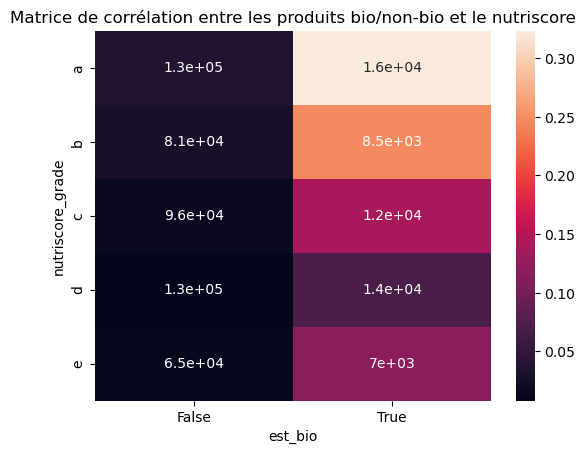

In [50]:
import seaborn as sns

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le nutriscore')
plt.show()

In [62]:
import plotly.express as px
fig = px.scatter(corré_bio_quali_nutri, x="nutriscore_grade", y="est_bio")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: nutriscore_grade

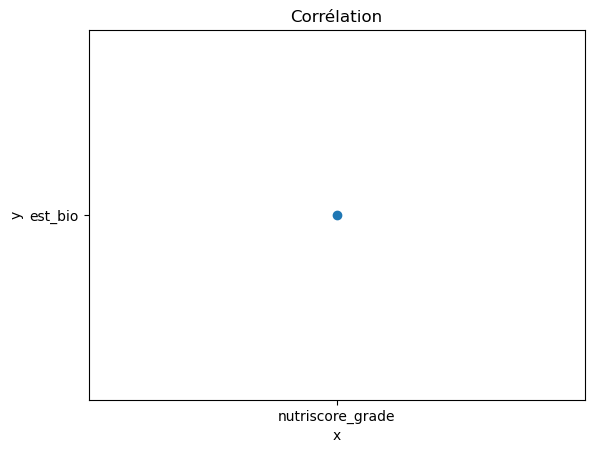

In [52]:
import matplotlib.pyplot as plt

x = "nutriscore_grade"
y = "est_bio"

plt.scatter(x,y)

plt.title('Corrélation')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')
plt.show()

In [53]:
import plotly.express as px
corré_bio_quali_nutri = px.data.tips()
fig = px.strip(corré_bio_quali_nutri, x="nutriscore_grade", y="product_name", orientation="h", color="est_bio")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] but received: nutriscore_grade

### Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

In [54]:
corré_bio_env = pd.merge(bio,env, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_env

,product_name,brands_tags,est_bio,code,quantity,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,ecoscore_A,ecoscore_E,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,NaN,NaN,both
1,Skyr,danone,False,03414569,NaN,en:france,140g,https://images.openfoodfacts.org/images/produc...,b,False,False,False,NaN,NaN,both
2,Skyr,danone,False,04319111,825 g,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,True,False,False,NaN,NaN,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,NaN,d,False,False,False,NaN,NaN,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",1 pot (140g),https://images.openfoodfacts.org/images/produc...,b,True,False,False,NaN,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,NaN,NaN,both


In [55]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "est_bio"

cont_2 = corré_bio_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

est_bio,False,True,Total
ecoscore_grade,,,
a,13545,6249,19794
b,65416,20511,85927
c,67860,11630,79490
d,238178,13387,251565
e,88525,4068,92593
not-applicable,13821,1076,14897
unknown,383006,43134,426140
Total,870351,100055,970406


In [56]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(corré_bio_env[[X,Y]].dropna())
indep2 = round(tx.dot(ty) / n)
indep2

est_bio,False,True,Total
ecoscore_grade,,,
a,17753.0,2041.0,19794.0
b,77067.0,8860.0,85927.0
c,71294.0,8196.0,79490.0
d,225627.0,25938.0,251565.0
e,83046.0,9547.0,92593.0
not-applicable,13361.0,1536.0,14897.0
unknown,382202.0,43938.0,426140.0
Total,870351.0,100055.0,970406.0


In [57]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [58]:
chi2, p, dof, expected_freq= chi2_contingency(cont_2)
chi2

38809.987511178806

In [59]:
p

0.0

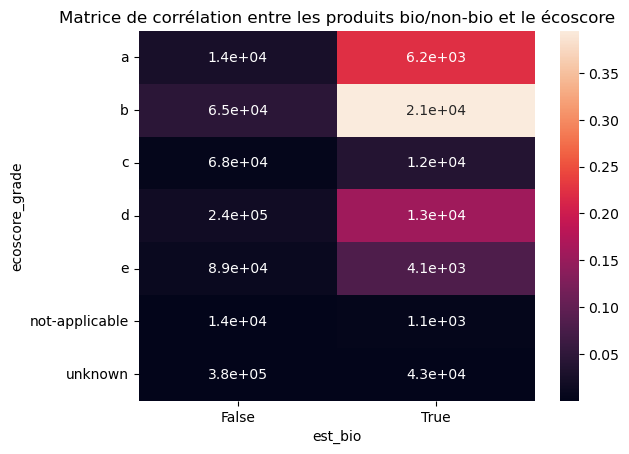

In [60]:
import seaborn as sns

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep2)**2/indep2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le écoscore')
plt.show()

### Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspect envionnemental ?

In [98]:
corré_quali_nutri_env = pd.merge(quali,env, on = ['code'], how= 'inner', indicator = True)
corré_quali_nutri_env

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ingredients_tags,nutriscore_grade,energy-kcal_100g,...,quantity_y,brands_tags_y,countries_tags_y,serving_size_y,image_url_y,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,...,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,...,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
2,0000000000031,Cacao,130 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,...,130 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,...,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,False,both
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,...,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999398,9999991087217,Pastilles à l'eau de lourdes,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,397.0,...,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
999399,9999991950191,Pain d’epices,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,...,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,b,False,False,False,both
999400,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,...,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
999401,9999992756068,Steak haché,500 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,...,500 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,e,False,False,False,both


In [99]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "nutriscore_grade"

cont_3 = corré_quali_nutri_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,3719,2121,2225,1437,241,9743
b,13516,8233,13405,14692,4072,53918
c,4407,4781,10698,14941,7187,42014
d,4919,7334,16416,25998,14477,69144
e,3930,5683,7716,18934,16145,52408
not-applicable,2109,801,376,507,1487,5280
unknown,12828,13321,19384,24237,19966,89736
Total,45428,42274,70220,100746,63575,322243


In [100]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_3.loc[:,["Total"]]
ty = cont_3.loc[["Total"],:]
n = len(corré_quali_nutri_env[[X,Y]].dropna())
indep3 = round(tx.dot(ty) / n)
indep3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,1374.0,1278.0,2123.0,3046.0,1922.0,9743.0
b,7601.0,7073.0,11749.0,16857.0,10637.0,53918.0
c,5923.0,5512.0,9155.0,13135.0,8289.0,42014.0
d,9748.0,9071.0,15067.0,21617.0,13641.0,69144.0
e,7388.0,6875.0,11420.0,16385.0,10340.0,52408.0
not-applicable,744.0,693.0,1151.0,1651.0,1042.0,5280.0
unknown,12650.0,11772.0,19554.0,28055.0,17704.0,89736.0
Total,45428.0,42274.0,70220.0,100746.0,63575.0,322243.0


In [101]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [102]:
chi2, p, dof, expected_freq= chi2_contingency(cont_3)
chi2

32889.239627868184

In [103]:
p

0.0

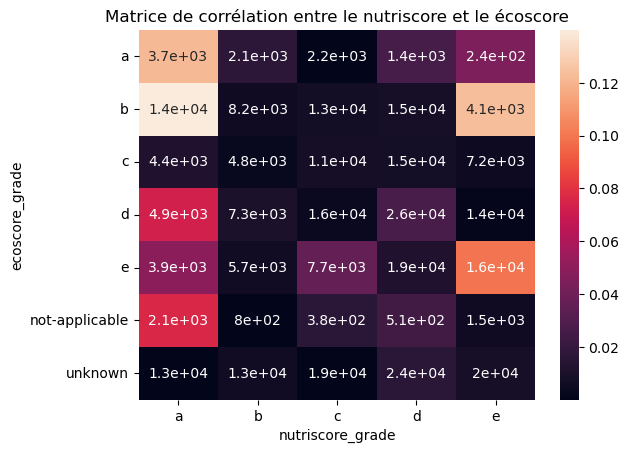

In [104]:
import seaborn as sns

c = cont_3.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep3)**2/indep3
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le nutriscore et le écoscore')
plt.show()

### Quelles marques faut-il recommander ?

In [113]:
#transformer les bool aux ciffres
quali_marge = quali[["brands_tags", "code", "product_name", "nutriscore_grade"]]
nutriscore_grade = {"a":5, "b":4, "c":3, "d":2, "e":1}
quali_marge

,brands_tags,code,product_name,nutriscore_grade
0,danone,00000000000026772226,Skyr,a
1,Inconnu,0000000000017,Vitória crackers,NaN
2,Inconnu,0000000000031,Cacao,NaN
3,courte-paille,0000000000100,moutarde au moût de raisin,d
4,Inconnu,0000000000123,Sauce Sweety chili 0%,NaN
...,...,...,...,...
932861,Inconnu,9999991953895,Crème de Marrons,NaN
932862,Inconnu,9999992756068,Steak haché,NaN
932863,Inconnu,9999992756112,Steak haché,NaN
932864,pages,999999999,Thé noir BIO Darjeeling,NaN


In [114]:
quali_marge['score_total'] = quali_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(nutriscore_grade)), axis=1) 

KeyError: "None of [Index(['a', 'b', 'c', 'd', 'e'], dtype='object')] are in the [columns]"

In [ ]:
quali_trie = quali_marge.sort_values('score_total', ascending=False)
quali_trie

In [ ]:
top_NS = quali_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False).head(5)
top_NS

### Quelles marques ne faut-il surtout pas recommander ?

In [105]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [115]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,Inconnu,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
